In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


# import libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score


In [3]:
df=pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


 # Data Cleaning
* **check the null values** 
* **check the duplicates**
* **check the statistics summry of the data set**
* **check the data set data types**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.duplicated().sum()

33

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# EDA

In [10]:
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0}).astype(int)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [11]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0}).astype(int)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: xlabel='GENDER', ylabel='LUNG_CANCER'>

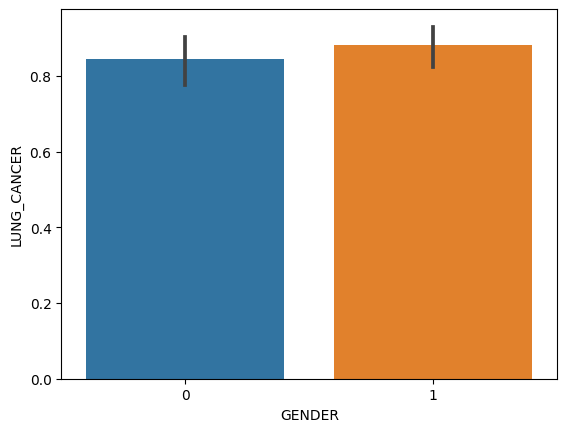

In [12]:
sns.barplot(x=df.GENDER,y=df.LUNG_CANCER)

<Axes: >

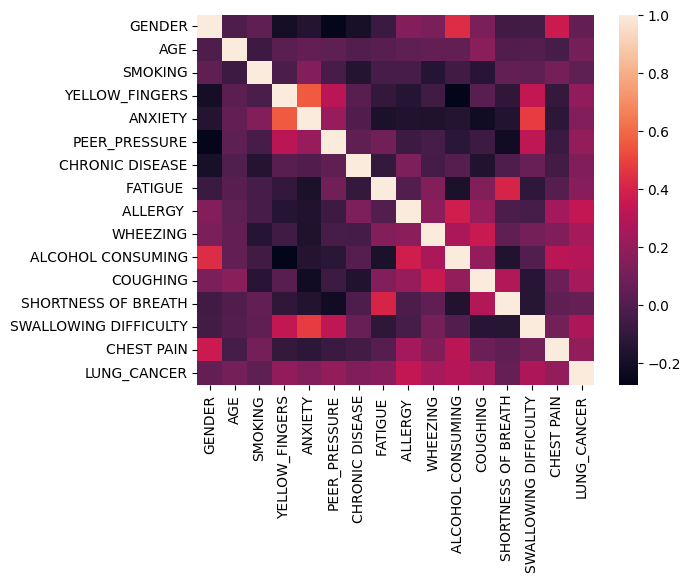

In [13]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

<Axes: xlabel='SMOKING', ylabel='LUNG_CANCER'>

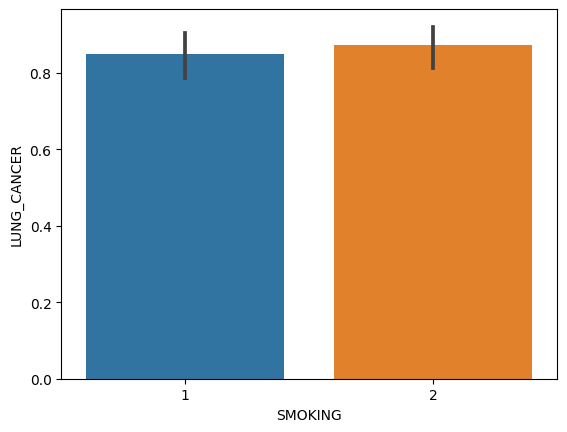

In [14]:
sns.barplot(x=df.SMOKING,y=df.LUNG_CANCER)

In [15]:
df.groupby('LUNG_CANCER')['AGE'].mean()

LUNG_CANCER
0    60.684211
1    63.264706
Name: AGE, dtype: float64

# split  the data 

In [16]:
X=df.drop(columns='LUNG_CANCER')
y=df['LUNG_CANCER'].values

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(220, 15)
(56, 15)
(220,)
(56,)


# train different models

In [19]:
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred1=model1.predict_proba(X_test)[:,1]
AUC=roc_auc_score(y_test,y_pred1)
AUC

0.7733333333333334

In [20]:
mode2=RandomForestClassifier()
mode2.fit(X_train,y_train)
y_pred2=mode2.predict_proba(X_test)[:,1]
AUC=roc_auc_score(y_test,y_pred2)
AUC

0.9600000000000001

In [21]:
model3=LogisticRegression()
model3.fit(X_train,y_train)
y_pred3=model3.predict_proba(X_test)[:,1]
AUC=roc_auc_score(y_test,y_pred3)
AUC

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334

In [22]:
model4=xgb.XGBClassifier()
model4.fit(X_train,y_train)
y_pred4=model4.predict_proba(X_test)[:,1]
AUC=roc_auc_score(y_test,y_pred4)
AUC

0.96

# plot false postive rate VS True postive rate for all models

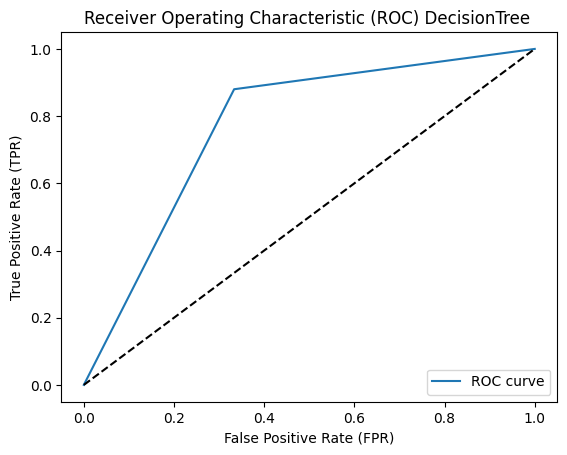

In [23]:
fpr,tpr,threashouds=roc_curve(y_test,y_pred1)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) DecisionTree ')
plt.legend(loc='lower right')
plt.show()

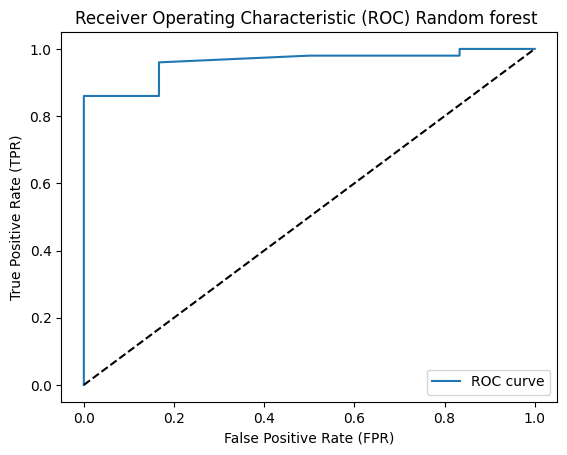

In [24]:
fpr,tpr,threashouds=roc_curve(y_test,y_pred2)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Random forest ')
plt.legend(loc='lower right')
plt.show()

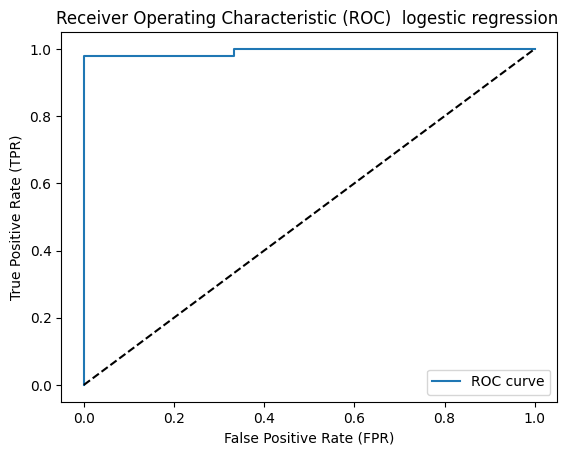

In [25]:
fpr,tpr,threashouds=roc_curve(y_test,y_pred3)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)  logestic regression ')
plt.legend(loc='lower right')
plt.show()

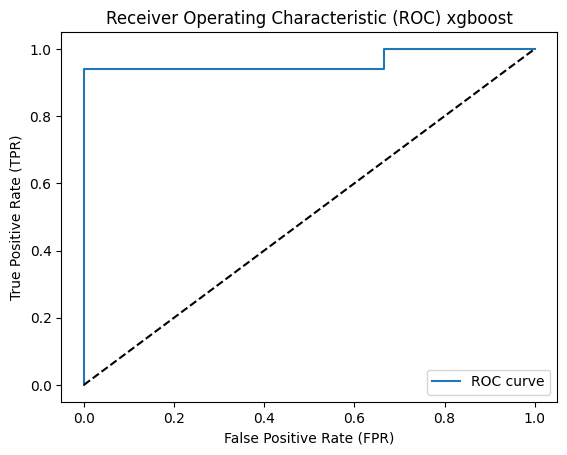

In [26]:
fpr,tpr,threashouds=roc_curve(y_test,y_pred4)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) xgboost')
plt.legend(loc='lower right')
plt.show()

In [27]:

max_depth=[2,4,6,8,10,15,20,25,30,35,40,45,50,100,150]
score=[]
for d in max_depth:
      model=RandomForestClassifier(max_depth=d)
      model.fit(X_train,y_train)
      y_pred=model.predict_proba(X_test)[:,1]
      AUC=roc_auc_score(y_test,y_pred)
      score.append((d,AUC))


<Axes: xlabel='max_depth', ylabel='AUC'>

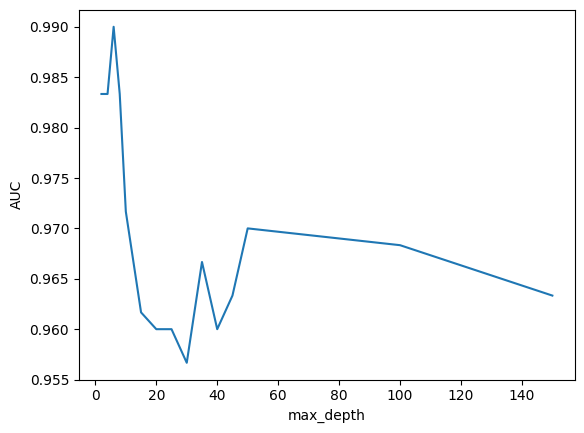

In [28]:
df_score=pd.DataFrame(score,columns=['max_depth','AUC'])
sns.lineplot(x=df_score.max_depth,y=df_score.AUC)

In [29]:
n=[10,20,30,50,70,80,100,120,150]
n_score=[]
for n in max_depth:
      model=RandomForestClassifier(n_estimators=n)
      model.fit(X_train,y_train)
      y_pred=model.predict_proba(X_test)[:,1]
      AUC=roc_auc_score(y_test,y_pred)
      n_score.append((n,AUC))

In [30]:
n_score

[(2, 0.8833333333333333),
 (4, 0.8766666666666666),
 (6, 0.9816666666666667),
 (8, 0.9733333333333334),
 (10, 0.9516666666666667),
 (15, 0.9766666666666667),
 (20, 0.9500000000000001),
 (25, 0.9616666666666667),
 (30, 0.9716666666666666),
 (35, 0.9716666666666667),
 (40, 0.9600000000000001),
 (45, 0.9666666666666667),
 (50, 0.9633333333333334),
 (100, 0.9616666666666666),
 (150, 0.9633333333333334)]

<Axes: xlabel='n_estimator', ylabel='AUC'>

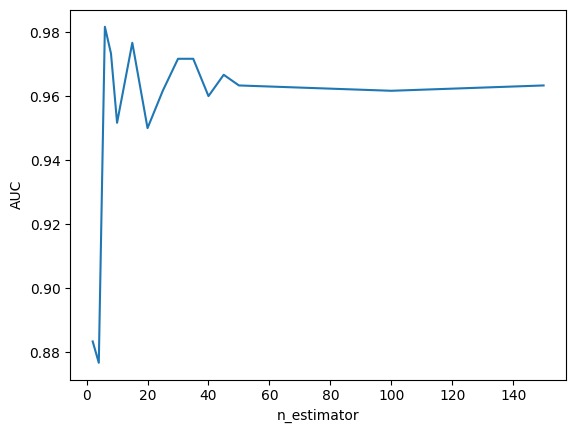

In [31]:
df_n_score=pd.DataFrame(n_score,columns=['n_estimator','AUC'])
sns.lineplot(x=df_n_score.n_estimator,y=df_n_score.AUC)

# Train the final model  with parameters

In [32]:
final_model=RandomForestClassifier(max_depth=20,n_estimators=80,random_state=42)
final_model.fit(X_train,y_train)
y_pred=final_model.predict_proba(X_test)[:,1]
AUC=roc_auc_score(y_test,y_pred)
AUC

0.9633333333333334

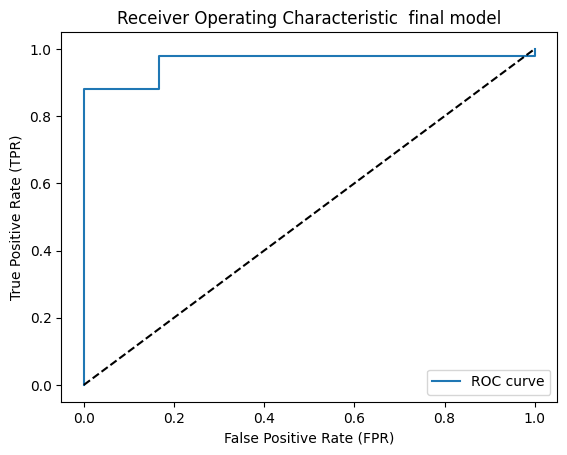

In [33]:
fpr,tpr,threashouds=roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic  final model')
plt.legend(loc='lower right')
plt.show()

# cross validation 

In [34]:
cv_scores=cross_val_score(final_model,X,y,cv=5,scoring='roc_auc')
cv_scores_avrage=cv_scores.mean()
cv_scores_avrage

0.9346734105876392

#  model feature importance

In [35]:
columns=X.columns
reshaped_columns = np.array(X.columns).reshape(-1, 1)

feature_importance=final_model.feature_importances_
feature_importance

array([0.04263251, 0.20961195, 0.03471178, 0.06795688, 0.05086497,
       0.05485212, 0.05851325, 0.05116099, 0.08481238, 0.05643248,
       0.07095905, 0.05028581, 0.0504376 , 0.0658183 , 0.05094992])

In [36]:
df_feaures=df = pd.DataFrame({'Feature_Importance': feature_importance, 'feature': columns})
df_feaures=df.sort_values(by='Feature_Importance',ascending=False)

In [37]:
df_feaures

,Feature_Importance,feature
1,0.209612,AGE
8,0.084812,ALLERGY
10,0.070959,ALCOHOL CONSUMING
3,0.067957,YELLOW_FINGERS
13,0.065818,SWALLOWING DIFFICULTY
6,0.058513,CHRONIC DISEASE
9,0.056432,WHEEZING
5,0.054852,PEER_PRESSURE
7,0.051161,FATIGUE
14,0.050950,CHEST PAIN


<Axes: xlabel='Feature_Importance', ylabel='feature'>

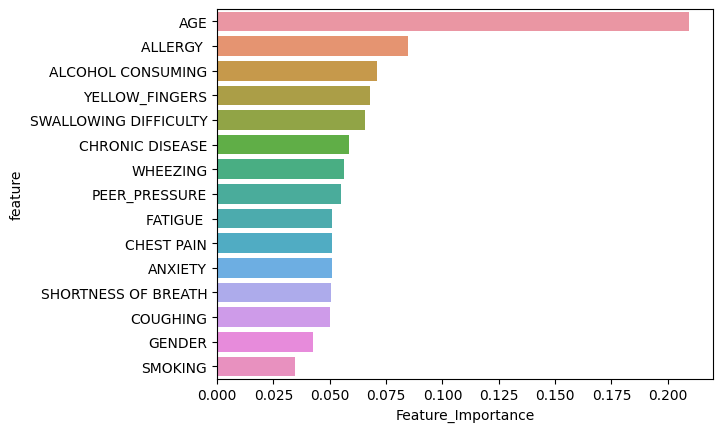

In [38]:
sns.barplot(x='Feature_Importance',y='feature',data=df_feaures)
